In [90]:
import sys
print(sys.executable)

/home/21101405/miniconda3/bin/python


In [91]:
import xarray as xr
import numpy as np

In [92]:
base_path = "/A04/so_data/Trend_paper/CNN_training/obs/"
chl_file = base_path + "Same_grid_CHL_25km.nc"
sst_file = base_path + "Same_grid_SST_25km.nc"
mld_file = base_path + "Same_grid_MLD_25km.nc"
ws_file  = base_path + "Same_Grid_Wind_25km.nc"
par_file=base_path + "Same_Grid_PAR_25km.nc"

In [30]:
ds_sst = xr.open_dataset(sst_file)
ds_mld = xr.open_dataset(mld_file)
ds_ws  = xr.open_dataset(ws_file)
ds_par=xr.open_dataset(par_file)

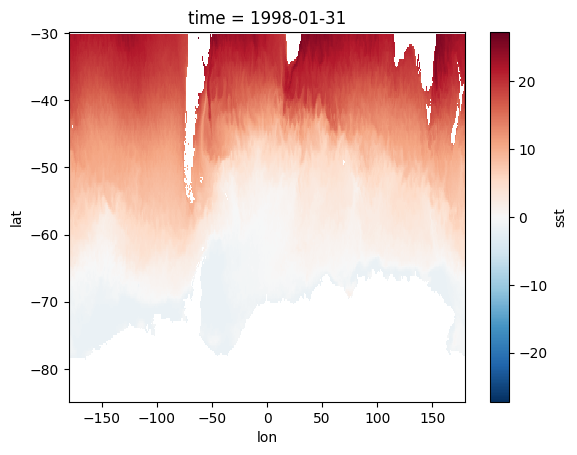

In [5]:
ds_sst.sst[0].plot()

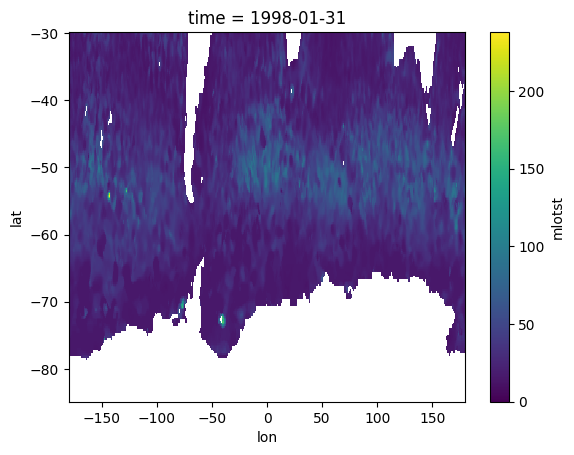

In [6]:
ds_mld.mlotst[0].plot()

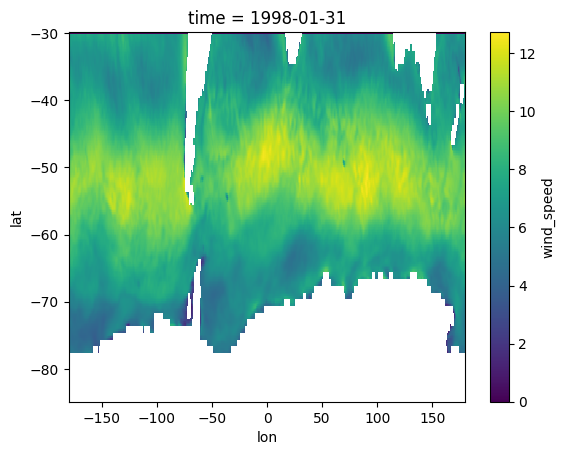

In [7]:
ds_ws.wind_speed[0].plot()

In [31]:
import xarray as xr

In [32]:
mask_2d=xr.open_dataset("/A04/so_data/DATA/mask_so_land_ocean.nc")
mask_2d=mask_2d.sel(lat=mask_2d.lat[::-1])
mask_2d

<xarray.Dataset> Size: 1MB
Dimensions:                        (lat: 220, lon: 1440)
Coordinates:
  * lat                            (lat) float64 2kB -30.0 -30.25 ... -84.75
  * lon                            (lon) float64 12kB -180.0 -179.8 ... 179.8
Data variables:
    __xarray_dataarray_variable__  (lat, lon) float32 1MB ...

In [33]:
mask_2d = mask_2d['__xarray_dataarray_variable__']
mask_2d

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 220, lon: 1440)> Size: 1MB
[316800 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 2kB -30.0 -30.25 -30.5 -30.75 ... -84.25 -84.5 -84.75
  * lon      (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
Attributes:
    regrid_method:  bilinear

In [34]:
ds_sst = ds_sst.assign_coords(mask=mask_2d)
ds_mld = ds_mld.assign_coords(mask=mask_2d)
ds_ws  = ds_ws.assign_coords(mask=mask_2d)
ds_par=ds_par.assign_coords(mask=mask_2d)

In [15]:
merged_ds = xr.merge([ds_sst, ds_mld, ds_ws])
merged_ds

<xarray.Dataset> Size: 1GB
Dimensions:     (time: 312, lat: 220, lon: 1440)
Coordinates:
  * time        (time) datetime64[ns] 2kB 1998-01-31 1998-02-28 ... 2023-12-31
  * lat         (lat) float64 2kB -30.0 -30.25 -30.5 ... -84.25 -84.5 -84.75
  * lon         (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
    mask        (lat, lon) float32 1MB 0.0 0.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0
Data variables:
    sst         (time, lat, lon) float32 395MB ...
    mlotst      (time, lat, lon) float32 395MB ...
    wind_speed  (time, lat, lon) float32 395MB ...
Attributes:
    regrid_method:  bilinear

In [16]:
merged_ds = merged_ds.rename({"lat": "latitude", "lon": "longitude"})
merged_ds

<xarray.Dataset> Size: 1GB
Dimensions:     (time: 312, latitude: 220, longitude: 1440)
Coordinates:
  * time        (time) datetime64[ns] 2kB 1998-01-31 1998-02-28 ... 2023-12-31
  * latitude    (latitude) float64 2kB -30.0 -30.25 -30.5 ... -84.5 -84.75
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    mask        (latitude, longitude) float32 1MB 0.0 0.0 1.0 ... 0.0 0.0 0.0
Data variables:
    sst         (time, latitude, longitude) float32 395MB ...
    mlotst      (time, latitude, longitude) float32 395MB ...
    wind_speed  (time, latitude, longitude) float32 395MB ...
Attributes:
    regrid_method:  bilinear

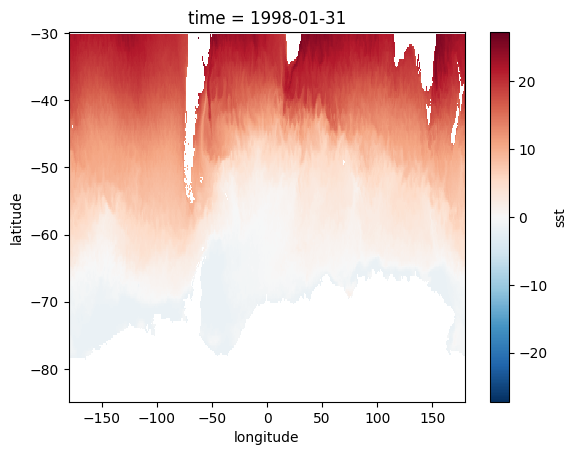

In [17]:
merged_ds.sst[0].plot()

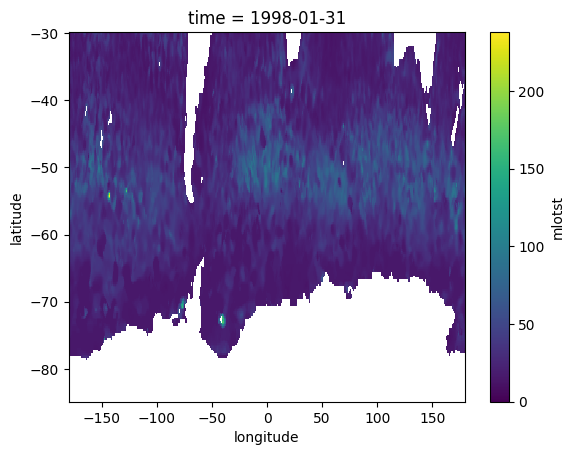

In [18]:
merged_ds.mlotst[0].plot()

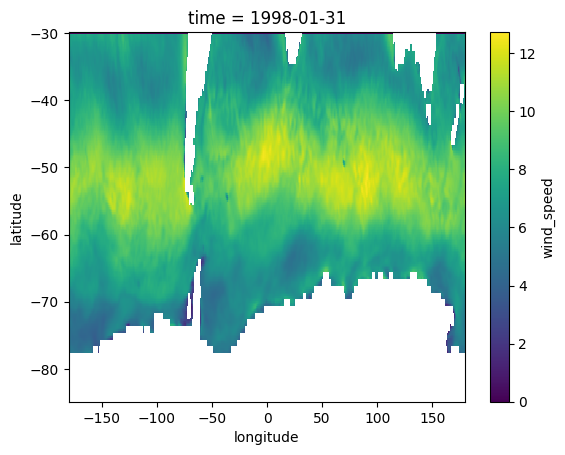

In [19]:
merged_ds.wind_speed[0].plot()

In [20]:
ds=merged_ds

{np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0)}


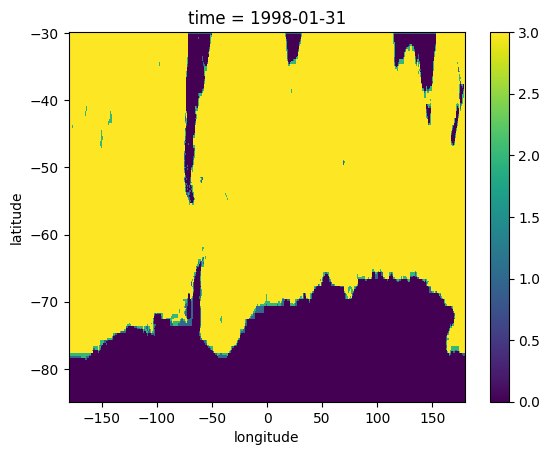

In [23]:
mask_SST = 1 * np.ones((ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.sst.isel(time=0))
mask_mld = 1 * np.ones((ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.mlotst.isel(time=0))
mask_wind = 1 * np.ones((ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.wind_speed.isel(time=0))
#mask_par = 1 * np.ones((ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.par.isel(time=0))

# Add up all the masks
mask_sum = mask_SST + mask_mld + mask_wind 

# Plot the result
mask_sum.plot()

# Check the unique values in the mask
print(set(np.array(mask_sum).flatten()))

In [24]:
ds.coords['mask'] = (('latitude', 'longitude'), mask_sum.data)
ds = ds.where(ds['mask'] == 3)
print(set(np.array(ds.mask).flatten()))

{np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0)}


{np.float64(0.0), np.float64(3.0)}


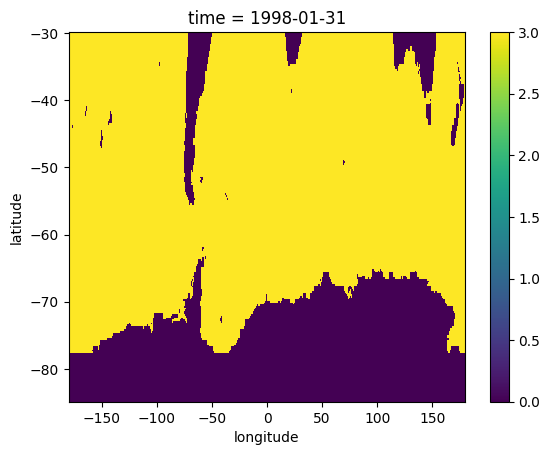

In [25]:
mask_SST = 1 * np.ones((ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.sst.isel(time=0))
mask_mld = 1 * np.ones((ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.mlotst.isel(time=0))
mask_wind = 1 * np.ones((ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.wind_speed.isel(time=0))
#mask_par = 1 * np.ones((ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.par.isel(time=0))

# Add up all the masks
mask_sum = mask_SST + mask_mld + mask_wind 

# Plot the result
mask_sum.plot()

# Check the unique values in the mask
print(set(np.array(mask_sum).flatten()))

In [ ]:
ds.to_netcdf("/A04/so_data/Trend_paper/CNN_training/obs/input_ds_sst_mld_ws.nc")

In [95]:
ds_chl = xr.open_dataset(chl_file)

In [96]:
mask_2d=mask_2d.rename({"lat": "latitude", "lon": "longitude"})
mask_2d

<xarray.DataArray '__xarray_dataarray_variable__' (latitude: 220,
                                                   longitude: 1440)> Size: 1MB
array([[0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 2kB -30.0 -30.25 -30.5 ... -84.25 -84.5 -84.75
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
Attributes:
    regrid_method:  bilinear

In [97]:
ds_chl = ds_chl.assign_coords(mask=mask_2d)
ds_chl

<xarray.Dataset> Size: 397MB
Dimensions:    (time: 312, latitude: 220, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 2kB 1998-01-31 1998-02-28 ... 2023-12-31
  * latitude   (latitude) float64 2kB -30.0 -30.25 -30.5 ... -84.25 -84.5 -84.75
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    mask       (latitude, longitude) float32 1MB 0.0 0.0 1.0 1.0 ... 0.0 0.0 0.0
Data variables:
    CHL        (time, latitude, longitude) float32 395MB ...
Attributes:
    regrid_method:  bilinear

In [32]:
ds_chl.to_netcdf("/A04/so_data/Trend_paper/CNN_training/obs/Same_grid_CHL_25km.nc")

### integrating PAR

In [50]:
ds_sst = ds_sst.sel(time=slice("2003-01-31", None))
ds_mld = ds_mld.sel(time=slice("2003-01-31", None))
ds_ws  = ds_ws.sel(time=slice("2003-01-31", None))

In [51]:
merged_ds = xr.merge([ds_sst, ds_mld, ds_ws, ds_par])
merged_ds

<xarray.Dataset> Size: 1GB
Dimensions:     (time: 252, lat: 220, lon: 1440)
Coordinates:
  * time        (time) datetime64[ns] 2kB 2003-01-31 2003-02-28 ... 2023-12-31
  * lat         (lat) float64 2kB -30.0 -30.25 -30.5 ... -84.25 -84.5 -84.75
  * lon         (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
    mask        (lat, lon) float32 1MB 0.0 0.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0
Data variables:
    sst         (time, lat, lon) float32 319MB ...
    mlotst      (time, lat, lon) float32 319MB ...
    wind_speed  (time, lat, lon) float32 319MB ...
    par         (time, lat, lon) float32 319MB ...
Attributes:
    regrid_method:  bilinear

In [52]:
merged_ds = merged_ds.rename({"lat": "latitude", "lon": "longitude"})
merged_ds

<xarray.Dataset> Size: 1GB
Dimensions:     (time: 252, latitude: 220, longitude: 1440)
Coordinates:
  * time        (time) datetime64[ns] 2kB 2003-01-31 2003-02-28 ... 2023-12-31
  * latitude    (latitude) float64 2kB -30.0 -30.25 -30.5 ... -84.5 -84.75
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    mask        (latitude, longitude) float32 1MB 0.0 0.0 1.0 ... 0.0 0.0 0.0
Data variables:
    sst         (time, latitude, longitude) float32 319MB ...
    mlotst      (time, latitude, longitude) float32 319MB ...
    wind_speed  (time, latitude, longitude) float32 319MB ...
    par         (time, latitude, longitude) float32 319MB ...
Attributes:
    regrid_method:  bilinear

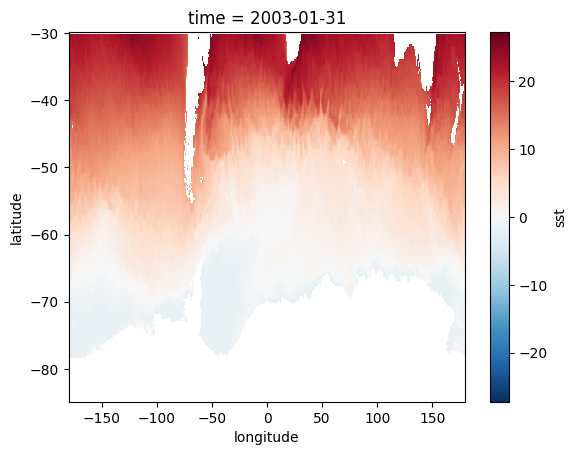

In [53]:
merged_ds.sst[0].plot()

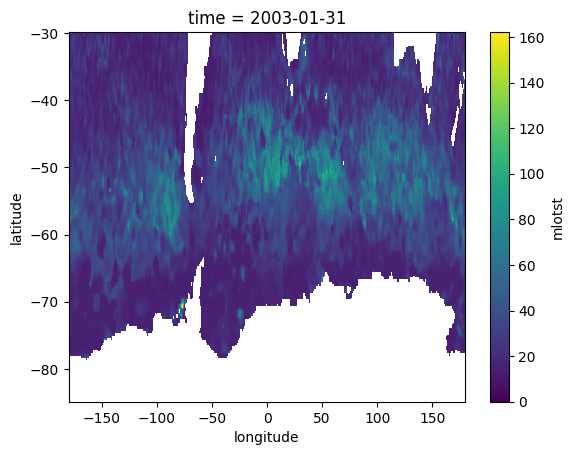

In [54]:
merged_ds.mlotst[0].plot()

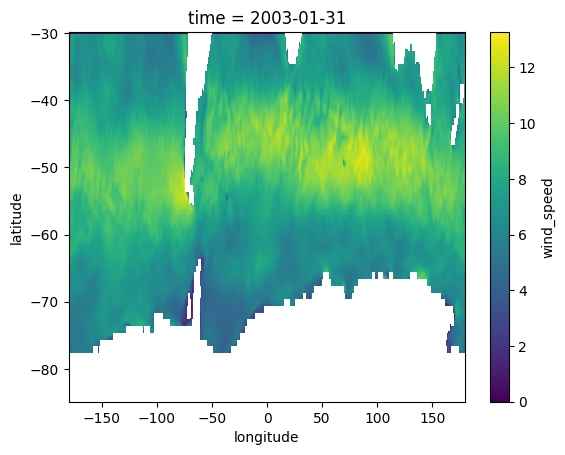

In [55]:
merged_ds.wind_speed[0].plot()

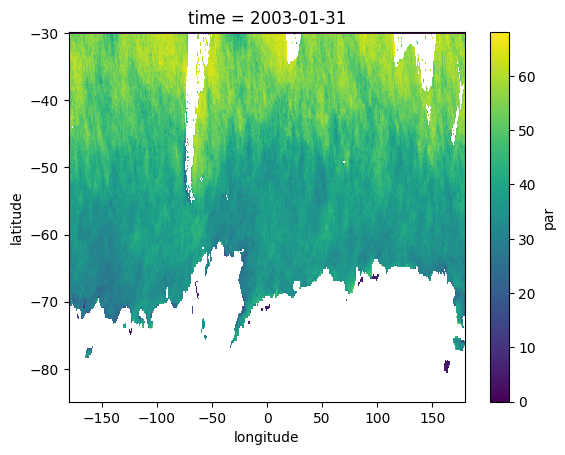

In [56]:
merged_ds.par[0].plot()

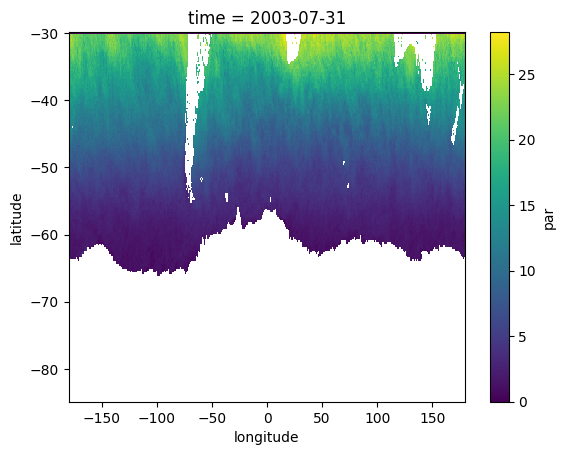

In [57]:
merged_ds.par[6].plot()

## masking all the step separetely

In [58]:
ds=merged_ds

{np.float64(0.0), np.float64(2.0), np.float64(3.0), np.float64(4.0)}


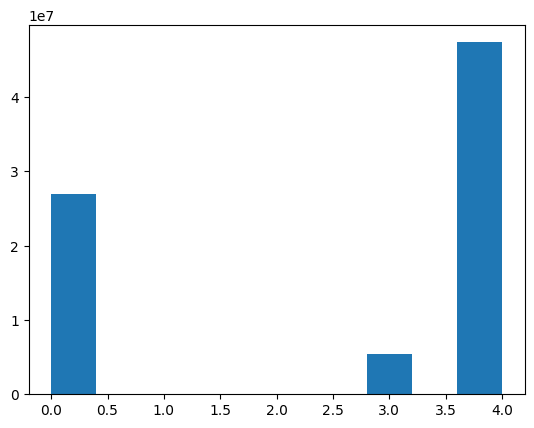

In [81]:
mask_SST = 1 * np.ones((ds.sizes['time'],ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.sst)
mask_mld = 1 * np.ones((ds.sizes['time'],ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.mlotst)
mask_wind = 1 * np.ones((ds.sizes['time'],ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.wind_speed)
mask_par = 1 * np.ones((ds.sizes['time'],ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.par)

# Add up all the masks
mask_sum = mask_SST + mask_mld + mask_wind + mask_par

# Plot the result
mask_sum.plot()

# Check the unique values in the mask
print(set(np.array(mask_sum).flatten()))

In [82]:
ds.coords['mask'] = (('time', 'latitude', 'longitude'), mask_sum.data)
ds = ds.where(ds['mask'] == 4)
print(set(np.array(ds.mask).flatten()))

{np.float64(0.0), np.float64(2.0), np.float64(3.0), np.float64(4.0)}


{np.float64(0.0), np.float64(4.0)}


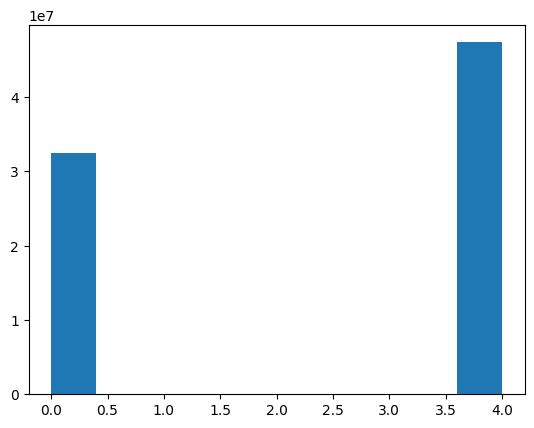

In [83]:
mask_SST = 1 * np.ones((ds.sizes['time'],ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.sst)
mask_mld = 1 * np.ones((ds.sizes['time'],ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.mlotst)
mask_wind = 1 * np.ones((ds.sizes['time'],ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.wind_speed)
mask_par = 1 * np.ones((ds.sizes['time'],ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.par)

# Add up all the masks
mask_sum = mask_SST + mask_mld + mask_wind + mask_par

# Plot the result
mask_sum.plot()

# Check the unique values in the mask
print(set(np.array(mask_sum).flatten()))

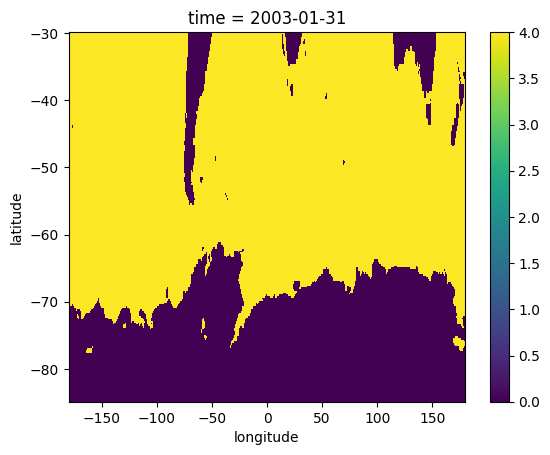

In [86]:
mask_sum[0].plot()

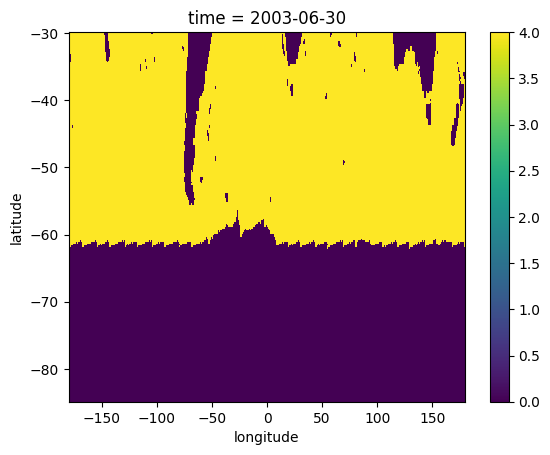

In [87]:
mask_sum[5].plot()

In [89]:
ds.to_netcdf("/A04/so_data/Trend_paper/CNN_training/obs/input_ds_sst_mld_ws_par_masked_time.nc")

In [98]:
ds_chl

<xarray.Dataset> Size: 397MB
Dimensions:    (time: 312, latitude: 220, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 2kB 1998-01-31 1998-02-28 ... 2023-12-31
  * latitude   (latitude) float64 2kB -30.0 -30.25 -30.5 ... -84.25 -84.5 -84.75
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    mask       (latitude, longitude) float32 1MB 0.0 0.0 1.0 1.0 ... 0.0 0.0 0.0
Data variables:
    CHL        (time, latitude, longitude) float32 395MB ...
Attributes:
    regrid_method:  bilinear

In [99]:
mask_chl = 1 * np.ones((ds_chl.sizes['time'],ds_chl.sizes['latitude'], ds_chl.sizes['longitude'])) * np.isfinite(ds_chl.CHL)
mask_chl

<xarray.DataArray 'CHL' (time: 312, latitude: 220, longitude: 1440)> Size: 791MB
array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
...
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * time       (time) datetime64[ns] 2kB 1998-01-31 1998-02-28 ... 2023-12-31
  * latitude   (latitude) float64 2kB -30.0 -30.25 -30.5 ... -84.25 -84.5 -84.75
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    mask       (latitude, longitude) float32 1MB 0.0 0.0 1.0 1.0 ... 0.0 0.0 0.0

In [100]:
ds_chl.coords['mask'] = (('time', 'latitude', 'longitude'),mask_chl.data)
ds_chl

<xarray.Dataset> Size: 1GB
Dimensions:    (time: 312, latitude: 220, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 2kB 1998-01-31 1998-02-28 ... 2023-12-31
  * latitude   (latitude) float64 2kB -30.0 -30.25 -30.5 ... -84.25 -84.5 -84.75
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    mask       (time, latitude, longitude) float64 791MB 1.0 1.0 1.0 ... 0.0 0.0
Data variables:
    CHL        (time, latitude, longitude) float32 395MB 0.0 0.06581 ... nan nan
Attributes:
    regrid_method:  bilinear

In [101]:
ds_chl.to_netcdf("/A04/so_data/Trend_paper/CNN_training/obs/Same_grid_CHL_25km_masked.nc")

{np.float64(0.0), np.float64(2.0), np.float64(3.0), np.float64(4.0)}


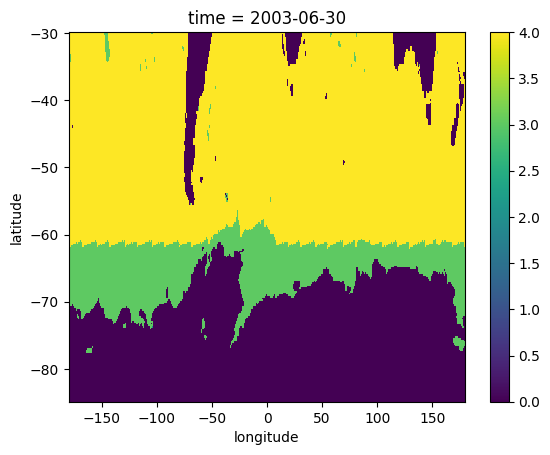

In [67]:
mask_SST = 1 * np.ones((ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.sst.isel(time=5))
mask_mld = 1 * np.ones((ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.mlotst.isel(time=5))
mask_wind = 1 * np.ones((ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.wind_speed.isel(time=5))
mask_par = 1 * np.ones((ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.par.isel(time=5))

# Add up all the masks
mask_sum = mask_SST + mask_mld + mask_wind + mask_par

# Plot the result
mask_sum.plot()

# Check the unique values in the mask
print(set(np.array(mask_sum).flatten()))

In [48]:
ds.coords['mask'] = (('latitude', 'longitude'), mask_sum.data)
ds = ds.where(ds['mask'] == 4)
print(set(np.array(ds.mask).flatten()))

{np.float64(0.0), np.float64(4.0)}


{np.float64(0.0), np.float64(4.0)}


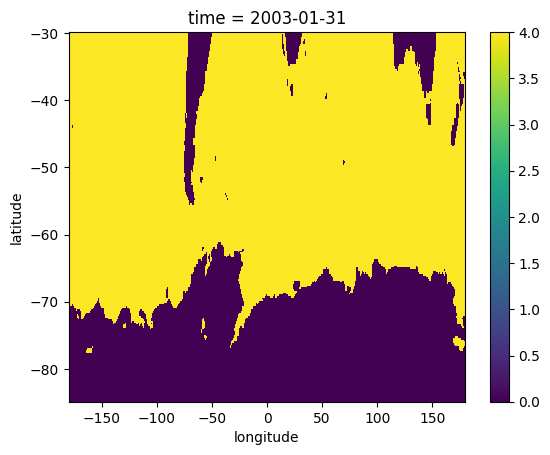

In [49]:
mask_SST = 1 * np.ones((ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.sst.isel(time=0))
mask_mld = 1 * np.ones((ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.mlotst.isel(time=0))
mask_wind = 1 * np.ones((ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.wind_speed.isel(time=0))
mask_par = 1 * np.ones((ds.sizes['latitude'], ds.sizes['longitude'])) * np.isfinite(ds.par.isel(time=0))

# Add up all the masks
mask_sum = mask_SST + mask_mld + mask_wind + mask_par

# Plot the result
mask_sum.plot()

# Check the unique values in the mask
print(set(np.array(mask_sum).flatten()))

In [44]:
ds

<xarray.Dataset> Size: 1GB
Dimensions:     (time: 252, latitude: 220, longitude: 1440)
Coordinates:
  * time        (time) datetime64[ns] 2kB 2003-01-31 2003-02-28 ... 2023-12-31
  * latitude    (latitude) float64 2kB -30.0 -30.25 -30.5 ... -84.5 -84.75
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    mask        (latitude, longitude) float64 3MB 3.0 3.0 4.0 ... 0.0 0.0 0.0
Data variables:
    sst         (time, latitude, longitude) float32 319MB nan nan ... nan nan
    mlotst      (time, latitude, longitude) float32 319MB nan nan ... nan nan
    wind_speed  (time, latitude, longitude) float32 319MB nan nan ... nan nan
    par         (time, latitude, longitude) float32 319MB nan nan ... nan nan
Attributes:
    regrid_method:  bilinear

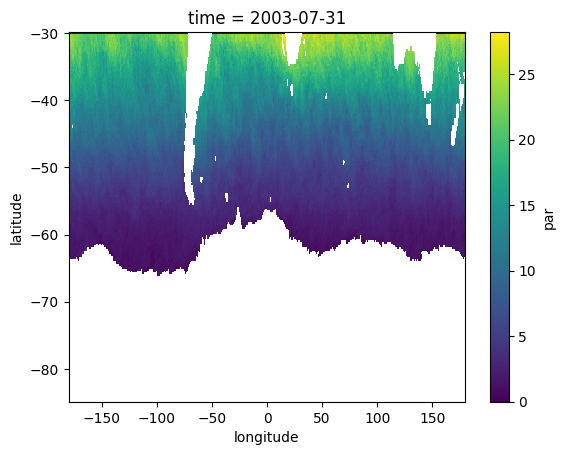

In [46]:
ds.par[6].plot()

In [24]:
ds.to_netcdf("/A04/so_data/Trend_paper/CNN_training/obs/input_ds_sst_mld_ws_par.nc")

In [75]:
ds=xr.open_dataset("/A04/so_data/Trend_paper/CNN_training/obs/input_ds_sst_mld_ws_par.nc")